In [1]:
# import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')



In [2]:
df=pd.read_csv('indian_house_prices.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [4]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
df.shape

(13320, 9)

In [6]:
# NAN Check

df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [7]:
def nan_check(df):
    return round((100*df.isnull().sum())/len(df),2)

In [8]:
nan_check(df)

area_type        0.00
availability     0.00
location         0.01
size             0.12
society         41.31
total_sqft       0.00
bath             0.55
balcony          4.57
price            0.00
dtype: float64

In [9]:
df['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

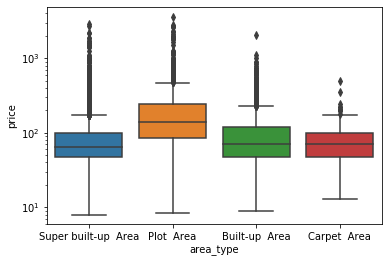

In [10]:
plt.yscale('log')
sb.boxplot(x='area_type',y='price',data=df)

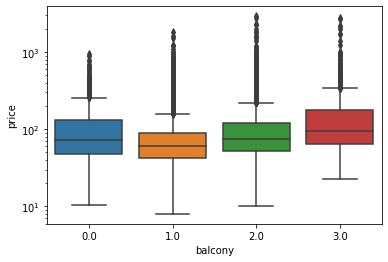

In [11]:
plt.yscale('log')
sb.boxplot(x='balcony',y='price',data=df)

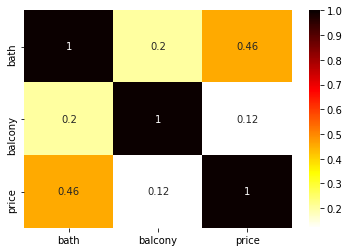

In [12]:
sb.heatmap(df.corr(),annot =True,cmap="hot_r")

In [13]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [14]:
# drop unncessary columns
df1=df.drop(['area_type','availability','society','balcony'],axis=1)

In [15]:
nan_check(df1)

location      0.01
size          0.12
total_sqft    0.00
bath          0.55
price         0.00
dtype: float64

In [16]:
df2=df1.dropna()

In [17]:
nan_check(df2)

location      0.0
size          0.0
total_sqft    0.0
bath          0.0
price         0.0
dtype: float64

In [18]:
df1['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [19]:
df2['size']=df2['size'].apply(lambda x:x.split()[0]).astype(int)

In [90]:
df2["size"]

0        2
1        4
2        3
3        3
4        2
        ..
13315    5
13316    4
13317    2
13318    4
13319    1
Name: size, Length: 13246, dtype: int32

In [20]:
df2['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [21]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [22]:
test_df=df2[~df2['total_sqft'].apply(is_float)]

In [23]:
test_df.head(10)

,location,size,total_sqft,bath,price
30,Yelahanka,4,2100 - 2850,4.0,186.000
122,Hebbal,4,3067 - 8156,4.0,477.000
137,8th Phase JP Nagar,2,1042 - 1105,2.0,54.005
165,Sarjapur,2,1145 - 1340,2.0,43.490
188,KR Puram,2,1015 - 1540,2.0,56.800
410,Kengeri,1,34.46Sq. Meter,1.0,18.500
549,Hennur Road,2,1195 - 1440,2.0,63.770
648,Arekere,9,4125Perch,9.0,265.000
661,Yelahanka,2,1120 - 1145,2.0,48.130
672,Bettahalsoor,4,3090 - 5002,4.0,445.000


In [24]:
def convert_sqft(x):
    token=x.split('-')
    if len(token) == 2:
        return (float(token[0])+float(token[1]))/2
    try:
        return float(x)
    except:
        return None

In [25]:
df3 = df2.copy()

In [26]:
df3['total_sqft']=df3['total_sqft'].apply(convert_sqft)

In [27]:
nan_check(df3)

location      0.00
size          0.00
total_sqft    0.35
bath          0.00
price         0.00
dtype: float64

In [28]:
df3[df3['total_sqft'].isnull()]

,location,size,total_sqft,bath,price
410,Kengeri,1,NaN,1.0,18.50
648,Arekere,9,NaN,9.0,265.00
775,Basavanagara,1,NaN,2.0,93.00
872,Singapura Village,2,NaN,2.0,45.00
1019,Marathi Layout,1,NaN,1.0,110.00
1086,Narasapura,2,NaN,2.0,29.50
1400,Chamrajpet,9,NaN,9.0,296.00
1712,Singena Agrahara,3,NaN,3.0,95.00
1743,Hosa Road,3,NaN,3.0,115.00
1821,Sarjapur,3,NaN,3.0,76.00


## IMPUTATION TECHNIQUE

In [29]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [30]:
imputer=IterativeImputer()

In [31]:
df3['total_sqft']=imputer.fit_transform(df3[['total_sqft']])

In [32]:
df3['total_sqft']=round(df3['total_sqft'],2)

In [33]:
nan_check(df3)

location      0.0
size          0.0
total_sqft    0.0
bath          0.0
price         0.0
dtype: float64

In [34]:
df3.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2,1056.0,2.0,39.07
1,Chikka Tirupathi,4,2600.0,5.0,120.00
2,Uttarahalli,3,1440.0,2.0,62.00
3,Lingadheeranahalli,3,1521.0,3.0,95.00
4,Kothanur,2,1200.0,2.0,51.00


In [35]:
# Let Create a Derived Column
df3['price_per_sqft'] = (df3['price']*100000)/df3['total_sqft']

In [36]:
df3.head()

,location,size,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,4250.000000


In [37]:
df3.location.nunique()

1304

In [38]:
df3.location=df3.location.str.lower()

In [39]:
df3.location.nunique()

1294

In [40]:
df3.head()

,location,size,total_sqft,bath,price,price_per_sqft
0,electronic city phase ii,2,1056.0,2.0,39.07,3699.810606
1,chikka tirupathi,4,2600.0,5.0,120.00,4615.384615
2,uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,kothanur,2,1200.0,2.0,51.00,4250.000000


In [41]:
df3['location']=df3['location'].str.strip()

In [42]:
df3.location.nunique()

1282

In [43]:
0loc=df3.groupby('location')['location'].agg('count').sort_values(ascending=False)

In [44]:
loc.unique()

array([535, 392, 304, 266, 236, 210, 186, 176, 175, 171, 152, 150, 149,
       141, 131, 106,  98,  96,  88,  87,  85,  84,  81,  79,  74,  73,
        72,  70,  68,  67,  66,  64,  63,  62,  60,  58,  57,  54,  53,
        52,  51,  50,  49,  48,  47,  46,  45,  44,  43,  42,  41,  40,
        39,  38,  37,  36,  34,  33,  32,  31,  30,  29,  28,  27,  26,
        25,  24,  23,  22,  21,  20,  19,  18,  17,  16,  15,  14,  13,
        12,  11,  10,   9,   8,   7,   6,   5,   4,   3,   2,   1],
      dtype=int64)

In [45]:
loc[loc<=10]

location
dairy circle                            10
sadashiva nagar                         10
ganga nagar                             10
btm 1st stage                           10
naganathapura                           10
                                        ..
kengeri satellite town khb apartment     1
kengeri satellite town ( bda site)       1
kenchanehalli r r nagar                  1
keerthi layout                           1
1 annasandrapalya                        1
Name: location, Length: 1041, dtype: int64

In [46]:
loc_of_10  = loc[loc<=10]

In [47]:
df3.location=df3.location.apply(lambda x:'other' if x in loc_of_10 else x)

In [48]:
df3['location'].nunique()

242

## OUTLIERS DETECTION - 1

In [49]:
df3.head(10)

,location,size,total_sqft,bath,price,price_per_sqft
0,electronic city phase ii,2,1056.0,2.0,39.07,3699.810606
1,chikka tirupathi,4,2600.0,5.0,120.00,4615.384615
2,uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,kothanur,2,1200.0,2.0,51.00,4250.000000
5,whitefield,2,1170.0,2.0,38.00,3247.863248
6,old airport road,4,2732.0,4.0,204.00,7467.057101
7,rajaji nagar,4,3300.0,4.0,600.00,18181.818182
8,marathahalli,3,1310.0,3.0,63.25,4828.244275
9,other,6,1020.0,6.0,370.00,36274.509804


In [50]:
len(df3[df3['bath']>df3['size']+1])

174

In [51]:
df4=df3[df3['bath']<=df3['size']+1]

In [52]:
df4[df4['bath']>df4['size']+1]

,location,size,total_sqft,bath,price,price_per_sqft


## OUTLIERS DETECTION - 2

In [53]:
df4.head()

,location,size,total_sqft,bath,price,price_per_sqft
0,electronic city phase ii,2,1056.0,2.0,39.07,3699.810606
1,chikka tirupathi,4,2600.0,5.0,120.00,4615.384615
2,uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,kothanur,2,1200.0,2.0,51.00,4250.000000


In [54]:
df4[df4['total_sqft']/df4['size']<300].head()

,location,size,total_sqft,bath,price,price_per_sqft
9,other,6,1020.0,6.0,370.0,36274.509804
45,hsr layout,8,600.0,9.0,200.0,33333.333333
58,murugeshpalya,6,1407.0,4.0,150.0,10660.980810
68,devarachikkanahalli,8,1350.0,7.0,85.0,6296.296296
70,other,3,500.0,3.0,100.0,20000.000000


In [55]:
df5=df4[~(df4['total_sqft']/df4['size']<300)]

In [56]:
len(df5)

12345

## Outlier Detection 3

In [57]:
df5['price_per_sqft'].describe([.10,.80,.90,.95,.99])

count     12345.000000
mean       6255.540700
std        4079.145880
min         267.829813
10%        3499.581847
50%        5273.311897
80%        7404.795487
90%        9930.887918
95%       13333.333333
99%       20833.333333
max      176470.588235
Name: price_per_sqft, dtype: float64

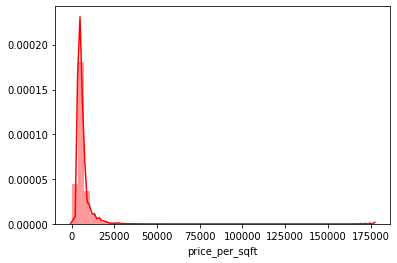

In [58]:
sb.distplot(df5['price_per_sqft'],color='red')

In [59]:
def cap_outliers(df):
    c = 0
    df_out=pd.DataFrame()
    for key,subset in df.groupby('location'):
        
        mu=np.mean(subset.price_per_sqft)
        sigma=np.std(subset.price_per_sqft)
        
        retained_df=subset[(subset.price_per_sqft>(mu-1*sigma)) & (subset.price_per_sqft<(mu+1*sigma))]
        
        df_out=pd.concat([df_out,retained_df],ignore_index=True)
    return df_out

In [60]:
df6=cap_outliers(df5)

In [61]:
print(len(df5))
print(len(df6))

12345
10158


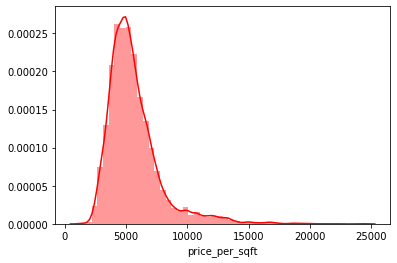

In [62]:
sb.distplot(df6['price_per_sqft'],color='red')

In [63]:
df6['price_per_sqft'].describe([.95,.99])

count    10158.000000
mean      5618.992767
std       2218.284588
min       1250.000000
50%       5154.772255
95%      10000.000000
99%      13668.282828
max      24509.803922
Name: price_per_sqft, dtype: float64

In [64]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10158 entries, 0 to 10157
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        10158 non-null  object 
 1   size            10158 non-null  int32  
 2   total_sqft      10158 non-null  float64
 3   bath            10158 non-null  float64
 4   price           10158 non-null  float64
 5   price_per_sqft  10158 non-null  float64
dtypes: float64(4), int32(1), object(1)
memory usage: 436.6+ KB


# ONE HOT ENCODING IN LOCATION COLUMN

In [65]:
location_dummy=pd.get_dummies(df6['location'])

location_dummy = location_dummy.drop('other',axis=1)

In [66]:
df7=pd.concat([df6,location_dummy],axis=1)

In [67]:
df7.drop('location',axis=1,inplace=True)

In [68]:
df7.head()

,size,total_sqft,bath,price,price_per_sqft,1st block jayanagar,1st phase jp nagar,2nd phase judicial layout,2nd stage nagarbhavi,5th block hbr layout,...,vijayanagar,vishveshwarya layout,vishwapriya layout,vittasandra,whitefield,yelachenahalli,yelahanka,yelahanka new town,yelenahalli,yeshwanthpur
0,4,2850.0,4.0,428.0,15017.543860,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,1630.0,3.0,194.0,11901.840491,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1875.0,2.0,235.0,12533.333333,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1200.0,2.0,130.0,10833.333333,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,1235.0,2.0,148.0,11983.805668,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
df7.bath.unique()

array([ 4.,  3.,  2.,  5.,  1.,  6.,  8.,  7.,  9., 16., 12., 13.])

In [70]:
bath_check = [12,13,16]
df7=df7[~(df7['bath'].isin(bath_check))]

In [71]:
df7.head()

,size,total_sqft,bath,price,price_per_sqft,1st block jayanagar,1st phase jp nagar,2nd phase judicial layout,2nd stage nagarbhavi,5th block hbr layout,...,vijayanagar,vishveshwarya layout,vishwapriya layout,vittasandra,whitefield,yelachenahalli,yelahanka,yelahanka new town,yelenahalli,yeshwanthpur
0,4,2850.0,4.0,428.0,15017.543860,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,1630.0,3.0,194.0,11901.840491,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1875.0,2.0,235.0,12533.333333,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1200.0,2.0,130.0,10833.333333,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,1235.0,2.0,148.0,11983.805668,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
df7.drop('price_per_sqft',axis=1,inplace=True)

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [74]:
y=df7.pop('price')
X = df7

# TRAIN  - TEST _ SPLIT

In [75]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=12)

In [76]:
normal = MinMaxScaler()
X_train=normal.fit_transform(X_train)

In [77]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

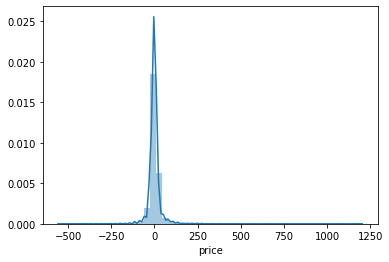

In [78]:
y_train_pred=model.predict(X_train)
res  = y_train - y_train_pred
sb.distplot(res)

In [79]:
r2_score(y_train,y_train_pred)

0.8094993982319963

# TEST THE MODEL

In [80]:
X_test=normal.transform(X_test)

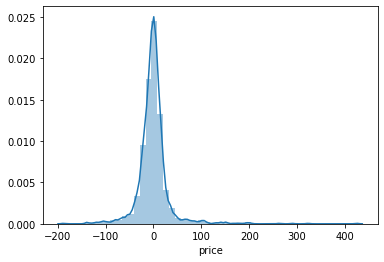

In [81]:
y_test_pred=model.predict(X_test)
res2  = y_test - y_test_pred
sb.distplot(res2)

In [82]:
r2_score(y_test,y_test_pred)

0.8443285302580463

In [83]:
df7.head(2)

,size,total_sqft,bath,1st block jayanagar,1st phase jp nagar,2nd phase judicial layout,2nd stage nagarbhavi,5th block hbr layout,5th phase jp nagar,6th phase jp nagar,...,vijayanagar,vishveshwarya layout,vishwapriya layout,vittasandra,whitefield,yelachenahalli,yelahanka,yelahanka new town,yelenahalli,yeshwanthpur
0,4,2850.0,4.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,1630.0,3.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
def single_price_predict(size,sqft,bath,location):
    try:
        location=location.lower()
        loc_index=np.squeeze(np.where(df7.columns==location))
        x=np.zeros(df7.shape[1])
        x[0] = size
        x[1] = sqft
        x[2] = bath
        if loc_index >=0:
            x[loc_index] = 1
        x_trans=normal.transform([x])
        return round(model.predict(x_trans)[0],2)
    except:0
        return "Invalid Location"

In [85]:
print("Total Estimated Rs. ",single_price_predict(1,300,1,'2nd stage nagarbhavi'),"Lacs")

Total Estimated Rs.  136.25 Lacs


In [86]:
## import pickle,json

In [87]:
## f = open('indian_house_price_model.pickle',"wb")
## pickle.dump(model,f)
 
## print("Model Saved")
## f.close()

In [88]:
## f2 = open('indian_house_price_scale.pickle',"wb")
## pickle.dump(normal,f2)

## print("Scale Data Saved")
## f2.close()

In [89]:
# JSON DATA
## columns = {"location":[i for i in df7.columns[3:]]}
## f = open("all_locations.json","w")
## json.dump(columns,f)

## print("json saved")
## f.close()

## END OF YOUR ML MODEL 